<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/Prediction_LSTM_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction LSTM Autoencoder
We can modify the reconstruction LSTM Autoencoder to instead predict the next step in the sequence.

In the case of our small contrived problem, we expect the output to be the sequence:

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
This means that the model will expect each input sequence to have nine time steps and the output sequence to have eight time steps.

[0.16472603 0.28873703 0.4030725  0.5097336  0.6107107  0.70712256
 0.79991025 0.88988936]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100)               40800     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 8, 100)           0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 8, 100)            80400     
                                                                 
 time_distributed_6 (TimeDis  (None, 8, 1)             101       
 tributed)                                                       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________

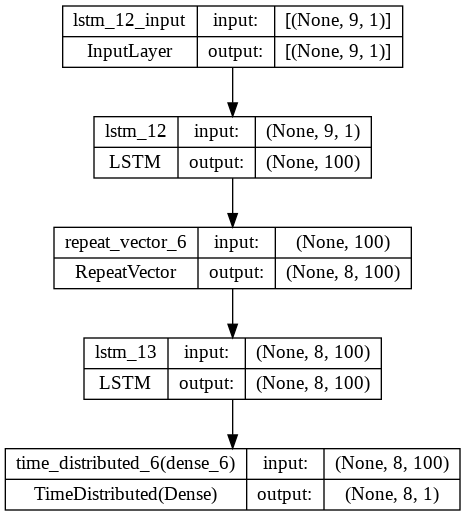

In [9]:
# lstm autoencoder predict sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])
model.summary()
plot_model(model, show_shapes=True)
